In [2]:
import pandas
import statistics
import numpy as np

data_frame = pandas.read_csv("Dataset/basic_work_orders.csv")
data_frame

,Machine Type,Main Part Replaced,Work Start Date
0,TRUCK 001,Engine,18/06/2015
1,TRUCK 001,Wheel,22/01/2015
2,TRUCK 001,Engine,14/07/2017
3,TRUCK 002,Engine,16/07/2016
4,TRUCK 002,Air Conditioning,16/05/2017
5,TRUCK 003,Engine,01/08/2017


#Question 1
   -Both of us had similar approach
   -Created a list of number of orders 
   -Found the maximum of the list and the corresponding truck
 PROBLEMS:
   -Does not work for a general number of trucks 
   

In [3]:
# Question 1 
truck1_df = data_frame[data_frame['Machine Type'] == "TRUCK 001"]
truck2_df = data_frame[data_frame['Machine Type'] == "TRUCK 002"]
truck3_df = data_frame[data_frame['Machine Type'] == "TRUCK 003"]

t1_wo = len(truck1_df)
t2_wo = len(truck2_df)
t3_wo = len(truck3_df)

if t1_wo > t2_wo and t1_wo > t3_wo:
    print("TRUCK 001 has the most work orders: " + str(len(truck1_df)))
if t2_wo > t1_wo and t2_wo >t3_wo:
    print("TRUCK 002 has the most work orders: " + str(len(truck2_df)))
if t3_wo > t1_wo and t3_wo >t2_wo:
    print("TRUCK 003 has the most work orders: " + str(len(truck3_df)))

TRUCK 001 has the most work orders: 3


In [4]:
#Question 1 changed to fix problems.



trk=[]
for i in range(len(set(data_frame['Machine Type']))): 
    trk.append(len(data_frame[data_frame['Machine Type'] == "TRUCK 00"+str(i+1)])) 
print(trk)
num=max(trk)
for i in range(3):
    if trk[i]==num:
        print('The Machine Type with the most orders is TRUCK 00' + str(i+1)+': with '+str(num)+' orders')



[3, 2, 1]
The Machine Type with the most orders is TRUCK 001: with 3 orders


#Question 2
    - very similar approach to question 1
    PROBLEMS:
    - Should have made a function for both questions

In [5]:
#Question 2 copy my first code
trk=[0,0,0]
for i in range(3): 
    trk[i]=len(data_frame[data_frame['Machine Type'] == "TRUCK 00"+str(i+1)]) 
num=min(trk)
for i in range(3):
    if trk[i]==num:
        print('The Machine Type with the least orders is TRUCK 00' + str(i+1)+': with '+str(num)+' orders')




The Machine Type with the least orders is TRUCK 003: with 1 orders


# Question 3
- Struggled --> Bubble Sort

In [6]:
# Question 3 sorted list

truck_total=len(set((data_frame['Machine Type'].values)))
order_count=[]
truck_list=[]
for i in range(truck_total):
    order_count.append(len(data_frame[data_frame['Machine Type'] == "TRUCK 00"+str(i+1)]))
    truck_list.append(len(data_frame[data_frame['Machine Type'] == "TRUCK 00"+str(i+1)]))
    truck_list[i]=['TRUCK00'+str(i+1),order_count[i]]
for i in range(len(order_count)):
    for j in range(len(order_count)):
        if truck_list[i][1] > truck_list[j][1]:
            truck_list[i][1],truck_list[j][1] =  truck_list[j][1],truck_list[i][1]
    
for i in range(len(truck_list)):
    print(str(truck_list[i][0])+ ': ' + str(truck_list[i][1]) + ' Work Orders')
    

TRUCK001: 3 Work Orders
TRUCK002: 2 Work Orders
TRUCK003: 1 Work Orders


#Question 4
- Similar problem of only being compatible with the parts given.
- If engine count is equal it could break

In [7]:
# Question 4 - Find the part that was most replaced.
engine_count = data_frame[data_frame['Main Part Replaced'] == "Engine"]
wheel_count = data_frame[data_frame['Main Part Replaced'] == "Wheel"]
ac_count = data_frame[data_frame['Main Part Replaced'] == "Air Conditioning"]

part1_replaced = len(engine_count)
part2_replaced = len(wheel_count)
part3_replaced = len(ac_count)



if part1_replaced > part2_replaced and part1_replaced > part3_replaced:
    print("Engine is the part most replaced: " + str(len(engine_count)))
if part2_replaced > part1_replaced and part2_replaced > part3_replaced:
    print("Wheel is the part most replaced: " + str(len(wheel_count)))
if part3_replaced > part1_replaced and part3_replaced > part2_replaced:
    print("Air Conditioning is the most part replaced: " + str(len(ac_count)))


Engine is the part most replaced: 4


#Question 5 - Link between date and part most replaced?
All in the summer, not enough data.


In [8]:
import pandas
import math
import numpy
data_frame = pandas.read_csv("Dataset/engine_work_orders_with_labour_hrs.csv")
data_frame

,Machine Type,Main Part Replaced,Assigned Maintenance Person,Labour Hours
0,TRUCK 001,Engine,Donald Knuth,11
1,TRUCK 001,Engine,Donald Knuth,14
2,TRUCK 001,Engine,Donald Knuth,13
3,TRUCK 001,Engine,Donald Knuth,14
4,TRUCK 001,Engine,Donald Knuth,14
5,TRUCK 001,Engine,Donald Knuth,14
6,TRUCK 001,Engine,Donald Knuth,13
7,TRUCK 001,Engine,John Carmack,10
8,TRUCK 001,Engine,John Carmack,9
9,TRUCK 001,Engine,John Carmack,12


# Question 1
Nominal vs Interval Ratio


# Question 2
- Made a count for labour hours called donald_jobs / john_jobs
- Found means and compared.

In [9]:
donald = []
john = []
donald_jobs = len(data_frame[data_frame['Assigned Maintenance Person']== "Donald Knuth"])
john_jobs = len(data_frame[data_frame['Assigned Maintenance Person']== "John Carmack"])
for i in range(donald_jobs):
    donald.append(data_frame['Labour Hours'].values[i])
for i in range(7,7+john_jobs):
    john.append(data_frame['Labour Hours'].values[i])
donald_mean=numpy.mean(donald)
john_mean=numpy.mean(john)
print('Mean time taken:')
print('Donald Knuth:'+str(donald_mean)[:4])
print('John Carmack:'+str(john_mean)[:4])
maximum=(max(donald_mean,john_mean))
if maximum==john_mean:
    print('Therefore Donald was the quickest ')
else:
    print('Therefore John was the quickest')



Mean time taken:
Donald Knuth:13.2
John Carmack:22.5
Therefore Donald was the quickest 


In [10]:
# Median including outliers
donald = sorted(donald)
donald_median = donald[int(len(donald)/2)]
john = sorted(john)
john_median = john[int(len(john)/2)]
print('Median time taken(including outliers):')
print('Donald Knuth:'+ str(donald_median))
print('John Carmack:'+ str(john_median))

Median time taken(including outliers):
Donald Knuth:14
John Carmack:10


In [11]:
#OUTLIERS
john_std = numpy.std(john)
print('JOHN: ' + str(john))
john_clean=john.copy()

for i in range(len(john)):
    if john[i]> john_mean + john_std  or  john[i]< john_mean- john_std:
        print(str(john[i]) + " is an outlier")
        del john_clean[i]
print("With outliers removed: " + str(john_clean))

donald_std = numpy.std(donald)
print('JOHN: ' + str(donald))
donald_clean=donald.copy()

for i in range(len(donald)):
    if donald[i]> donald_mean + donald_std  or  donald[i]< donald_mean- donald_std:
        print(str(donald[i]) + " is an outlier")
        del donald_clean[i]
print("With outliers removed: " + str(donald_clean)) 

JOHN: [9, 9, 9, 10, 10, 12, 99]
99 is an outlier
With outliers removed: [9, 9, 9, 10, 10, 12]
JOHN: [11, 13, 13, 14, 14, 14, 14]
11 is an outlier
With outliers removed: [13, 13, 14, 14, 14, 14]


In [12]:
john_clean_mean = numpy.mean(john_clean)
donald_clean_mean = numpy.mean(donald_clean)
john_clean_median = numpy.median(john_clean)
donald_clean_median = numpy.median(donald_clean)

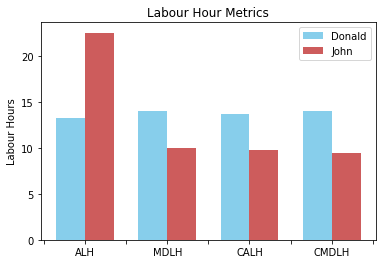

In [23]:
# QUESTION 7
import matplotlib as mpl
import matplotlib.pyplot as plt
donald_metrics = (13.2857, 14, 13.6667, 14)
john_metrics = (22.5714, 10, 9.833, 9.5)

ind = np.arange(len(donald_metrics))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, donald_metrics, width,
                color='SkyBlue', label='Donald')
rects2 = ax.bar(ind + width/2, john_metrics, width,
                color='IndianRed', label='John')


ax.set_ylabel('Labour Hours')
ax.set_title('Labour Hour Metrics')
ax.set_xticklabels(('', '', 'ALH', '',  'MDLH','', 'CALH', '', 'CMDLH'))

ax.legend()

plt.show()

[[13, 13, 14, 14, 14, 14], [9, 9, 9, 10, 10, 12]]

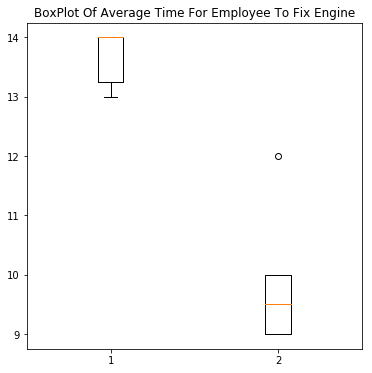

In [14]:
# QUESTION 9

import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

data_to_plot = [donald_clean, john_clean]

fig = plt.figure(1, figsize=(6, 6))

ax = fig.add_subplot(111)

ax.set_title('BoxPlot Of Average Time For Employee To Fix Engine')

bp = ax.boxplot(data_to_plot)

fig.savefig('fig1.png', bbox_inches='tight')

data_to_plot

In [24]:
# Function for deciding which employee it is
import pandas
import numpy as np
data_frame = pandas.read_csv("Dataset/unclean_work_orders_with_labour_hrs.csv")
print(data_frame)
def donorjohn(name):
    name = str(name)
    for t in range(len(name)):    
        if name[t] == 'd' or name[t] == 'D':
            return 'Donald Knuth'
        elif name[t] == 'j' or name[t] == 'J':
            return 'John Carmack'
    
    return 'NULL'
    
testname = 'Jon Knuth'
print(donorjohn(testname))

# create a list of correct names
correct_names=[]
for name in data_frame['Assigned Maintenance Person']:
    correct_names.append(donorjohn(name))    
    

   Machine Type Main Part Replaced Assigned Maintenance Person  Labour Hours
0     TRUCK 001             Engine                Donald Knuth          11.0
1     TRUCK 001             Engine               Donald Knuth…          14.0
2     TRUCK 001             Engine                Donald Knuth          13.0
3     TRUCK 001             Engine                Donald Knuth          14.0
4     TRUCK 001             Engine                Donald Knuth          14.0
5     TRUCK 001             Engine                Donald Knuth          14.0
6     TRUCK 001             Engine                   Don Knuth          13.0
7     TRUCK 001             Engine                john carmack          10.0
8      TRUCK 01             Engine                John Carmack           9.0
9     TRUCK 001             Engine                John Carmack          12.0
10    TRUCK 001             Engine                John Carmack          99.0
11    TRUCK 001             engine                John Carmack          10.0

In [16]:
# Function to filter the parts 
def filterparts(part):
    part = str(part)
    
    if part[0] == 'E' or part[0] == 'e':
        if part[1] == 'N' or part[1] == 'n':
            return 'Engine'
        return 'Exhaust'    
    elif part[0] == 'A' or part[0] == 'a':
        return 'Air Conditioning'
    elif part[0] == 'W' or part[0] == 'w':
        return 'Wheel'
    
    return 'NULL'
    
filterparts('whe')
    

'Wheel'

In [17]:
# Create a list of correct parts
correct_parts=[]
for parts in data_frame['Main Part Replaced']:
    correct_parts.append(filterparts(parts)) 



In [18]:
import math

# Function to Filter the labour hours
def filterhours(number):
    if math.isnan(number):
        
        return("NULL")
    else:
        return(int(number))
correct_hours = []    
for hr in data_frame['Labour Hours'].values:
    correct_hours.append(filterhours(hr))

In [19]:
# Create a 2D array of all the correct lists 
correct_frame = []
for i in range(len(data_frame['Assigned Maintenance Person'])):
    correct_frame.append([])
    correct_frame[i].append(correct_parts[i])
    correct_frame[i].append(correct_names[i])
    correct_frame[i].append(correct_hours[i])
    print(correct_frame[i])

['Engine', 'Donald Knuth', 11]
['Engine', 'Donald Knuth', 14]
['Engine', 'Donald Knuth', 13]
['Engine', 'Donald Knuth', 14]
['Engine', 'Donald Knuth', 14]
['Engine', 'Donald Knuth', 14]
['Engine', 'Donald Knuth', 13]
['Engine', 'John Carmack', 10]
['Engine', 'John Carmack', 9]
['Engine', 'John Carmack', 12]
['Engine', 'John Carmack', 99]
['Engine', 'John Carmack', 10]
['Engine', 'John Carmack', 9]
['Engine', 'John Carmack', 9]
['Wheel', 'Donald Knuth', 5]
['Wheel', 'Donald Knuth', 3]
['Wheel', 'Donald Knuth', 5]
['Wheel', 'Donald Knuth', 5]
['Wheel', 'John Carmack', 'NULL']
['Wheel', 'John Carmack', 3]
['Wheel', 'John Carmack', 3]
['Wheel', 'John Carmack', 6]
['Exhaust', 'John Carmack', 4]
['Exhaust', 'Donald Knuth', 5]
['Exhaust', 'Donald Knuth', 4]
['Air Conditioning', 'Donald Knuth', 5]
['Air Conditioning', 'Donald Knuth', 7]
['Air Conditioning', 'Donald Knuth', 4]
['Air Conditioning', 'Donald Knuth', 7]
['Air Conditioning', 'John Carmack', 10]
['Air Conditioning', 'John Carmack', 8

In [20]:
#Separate the corrected frame into one for each employee
donald_list = []
john_list = []
def employee_sorter(array):
    for i in range(len(array)):
        if array[i][1] == 'Donald Knuth':
            donald_list.append(array[i])
            
        elif array[i][1] == 'John Carmack':
            john_list.append(array[i])

#Function to estimate hours taken given employee and part
def estimate_hours(employee , part):
    nu_list=[]
    nu_hours=[]
    a=0
    for i in range(len(employee)):
        if employee[i][0] == part :
            nu_list.append(employee[a])
            nu_hours.append(nu_list[a][2])
            a+=1
    return np.mean(nu_hours)
    
    
            
employee_sorter(correct_frame)
print(estimate_hours(donald_list, 'Wheel'))
print(john_list)
print(estimate_hours(john_list, 'Wheel'))
correct_df = pandas.DataFrame(correct_frame, columns=['Part', 'Name', 'Hours'])
correct_df.to_csv('charlie_df.csv')
correct_df
            

13.0
[['Engine', 'John Carmack', 10], ['Engine', 'John Carmack', 9], ['Engine', 'John Carmack', 12], ['Engine', 'John Carmack', 99], ['Engine', 'John Carmack', 10], ['Engine', 'John Carmack', 9], ['Engine', 'John Carmack', 9], ['Wheel', 'John Carmack', 'NULL'], ['Wheel', 'John Carmack', 3], ['Wheel', 'John Carmack', 3], ['Wheel', 'John Carmack', 6], ['Exhaust', 'John Carmack', 4], ['Air Conditioning', 'John Carmack', 10], ['Air Conditioning', 'John Carmack', 8], ['Air Conditioning', 'John Carmack', 7], ['Air Conditioning', 'John Carmack', 9], ['Air Conditioning', 'John Carmack', 4], ['Air Conditioning', 'John Carmack', 5]]
32.5


,Part,Name,Hours
0,Engine,Donald Knuth,11
1,Engine,Donald Knuth,14
2,Engine,Donald Knuth,13
3,Engine,Donald Knuth,14
4,Engine,Donald Knuth,14
5,Engine,Donald Knuth,14
6,Engine,Donald Knuth,13
7,Engine,John Carmack,10
8,Engine,John Carmack,9
9,Engine,John Carmack,12


In [21]:
# calculate data for maxs charts

donald_means = [] 
donald_means.append(estimate_hours(donald_list,"Engine"))
donald_means.append(estimate_hours(donald_list,"Wheel"))
donald_means.append(estimate_hours(donald_list,"Exhaust"))
donald_means.append(estimate_hours(donald_list,"Air Conditioning"))

john_means = [] 
john_means.append(estimate_hours(john_list,"Engine"))
john_means.append(4.0)
john_means.append(estimate_hours(john_list,"Exhaust"))
john_means.append(estimate_hours(john_list,"Air Conditioning"))

print(donald_means)
print(john_means)



[13.285714285714286, 13.0, 12.5, 13.0]
[22.571428571428573, 4.0, 10.0, 24.833333333333332]


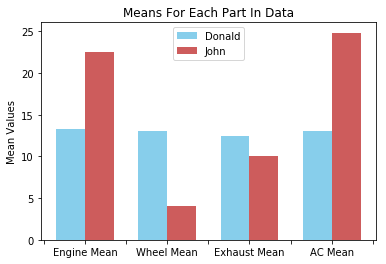

In [22]:


ind = np.arange(len(donald_means))  
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, donald_means, width,
                color='SkyBlue', label='Donald')
rects2 = ax.bar(ind + width/2, john_means, width,
                color='IndianRed', label='John')


ax.set_ylabel('Mean Values')
ax.set_title('Means For Each Part In Data')
ax.set_xticklabels(('', '','Engine Mean', '','Wheel Mean', '', 'Exhaust Mean', '', 'AC Mean'))

ax.legend()


